# MovieLens - Exploracyjna analiza danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from itertools import chain,cycle
import time
import requests
import math
import re

## Ramki danych

In [2]:
genome_scores = pd.read_csv('ml-latest/genome-scores.csv')
genome_tags = pd.read_csv('ml-latest/genome-tags.csv')
links = pd.read_csv('ml-latest/links.csv')
movies = pd.read_csv('ml-latest/movies.csv')
ratings = pd.read_csv('ml-latest/ratings.csv')
tags = pd.read_csv('ml-latest/tags.csv')

In [3]:
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [4]:
df = genome_scores.head(8)
d = genome_scores.describe()
display_side_by_side(df,d,titles = ['Genome_scores', 'Description'])

,movieId,tagId,relevance
0,1,1,0.02900
1,1,2,0.02375
2,1,3,0.05425
3,1,4,0.06875
4,1,5,0.16000
5,1,6,0.19525
6,1,7,0.07600
7,1,8,0.25200
,movieId,tagId,relevance
count,1.486253e+07,1.486253e+07,1.486253e+07


In [5]:
genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14862528 entries, 0 to 14862527
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 340.2 MB


In [6]:
genome_scores.shape

(14862528, 3)

In [7]:
df = genome_tags.head(8)
d = genome_tags.describe()
display_side_by_side(df,d,titles = ['Genome_tags', 'Description'])

Genome_tags 
 
 
 
 tagId 
 tag 
 
 
 
 
 0 
 1 
 007 
 
 
 1 
 2 
 007 (series) 
 
 
 2 
 3 
 18th century 
 
 
 3 
 4 
 1920s 
 
 
 4 
 5 
 1930s 
 
 
 5 
 6 
 1950s 
 
 
 6 
 7 
 1960s 
 
 
 7 
 8 
 1970s 
 
 
 Description 
 
 
 
 tagId 
 
 
 
 
 count 
 1128.000000 
 
 
 mean 
 564.500000 
 
 
 std 
 325.769857 
 
 
 min 
 1.000000 
 
 
 25% 
 282.750000 
 
 
 50% 
 564.500000 
 
 
 75% 
 846.250000 
 
 
 max 
 1128.000000

In [8]:
genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [9]:
genome_tags.shape

(1128, 2)

### Opis ramek *Genome_scores* i *Genome_tags*
W naszym zbiorze algorytm, powstały na zasadzie uczenia maszynowego, stworzył ramkę danych zawierającą tagi przyporządkowane różnym filmom. Ramka ta później została podzielona na dwie oddzielne. Ramka **Genome_scores** zawiera kolumny *movieID*, *tagID* oraz *relevance*.
* **movieID** - zawiera ID filmu, potrzebne do jego identyfikacji;
* **tagID** - zawiera ID taga; dzięki temu z ramki **Genome_tags** możemy odczytać jaki tag został przypisany do naszego filmu;
* **relevance** - określa trafność przypisanego tagu do danego filmu.

Ramka **Genome_tags** zawiera kolumny *tagID* oraz *tag*.
* **tagID** - zawiera ID taga;
* **tag** - zawiera nazwę konkretnego tagu.

In [10]:
df = links.head(8)
d = links.describe()
display_side_by_side(df,d,titles = ['Links', 'Description'])

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
,movieId,imdbId,tmdbId
count,58098.000000,5.809800e+04,57917.000000


In [11]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  58098 non-null  int64  
 1   imdbId   58098 non-null  int64  
 2   tmdbId   57917 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.3 MB


In [12]:
links.shape

(58098, 3)

### Opis ramki *Links*
Ramka **Links** służy do identyfikacji filmów na stronach **movielens.org**, **imdb.com** oraz **themoviedb.org**. Zawiera kolumny *movieID*, *imdbID* oraz *tmdbID*
* **movieID** - identyfikator filmu na stronie  https://movielens.org;
* **imdbID** - identyfikator filmu na stronie http://www.imdb.com;
* **tmdbID** - identyfikator filmu na stonie https://www.themoviedb.org.

In [13]:
df = movies.head(8)
d = movies.describe()
display_side_by_side(df,d,titles = ['Movies', 'Description'])

Movies 
 
 
 
 movieId 
 title 
 genres 
 
 
 
 
 0 
 1 
 Toy Story (1995) 
 Adventure|Animation|Children|Comedy|Fantasy 
 
 
 1 
 2 
 Jumanji (1995) 
 Adventure|Children|Fantasy 
 
 
 2 
 3 
 Grumpier Old Men (1995) 
 Comedy|Romance 
 
 
 3 
 4 
 Waiting to Exhale (1995) 
 Comedy|Drama|Romance 
 
 
 4 
 5 
 Father of the Bride Part II (1995) 
 Comedy 
 
 
 5 
 6 
 Heat (1995) 
 Action|Crime|Thriller 
 
 
 6 
 7 
 Sabrina (1995) 
 Comedy|Romance 
 
 
 7 
 8 
 Tom and Huck (1995) 
 Adventure|Children 
 
 
 Description 
 
 
 
 movieId 
 
 
 
 
 count 
 58098.000000 
 
 
 mean 
 111919.516197 
 
 
 std 
 59862.660956 
 
 
 min 
 1.000000 
 
 
 25% 
 72437.750000 
 
 
 50% 
 126549.000000 
 
 
 75% 
 161449.500000 
 
 
 max 
 193886.000000

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [15]:
movies.shape

(58098, 3)

### Opis ramki *Movies*
Ramka **Movies** pozwala nam na identyfikację filmu za pomocą jego ID. Zawiera kolumny *movieID*, *title* oraz *genres*.
* **movieID** - zawiera ID danego filmu potrzebne do jesgo identyfikacji;
* **title** - zawiera tytuł filmu, wprowadzony manualnie lub zimportowany ze strony themoviedb.org;
* **genres** - zawiera nazwę gatunku danego filmu.

Wszystkie gatunki zawarte w kolumnie *genres*:
* Action;
* Adventure;
* Animation;
* Children's;
* Comedy;
* Crime;
* Documentary;
* Drama;
* Fantasy;
* Film-Noir;
* Horror;
* Musical;
* Mystery;
* Romance;
* Sci-Fi;
* Thriller;
* War;
* Western.

In [16]:
df = ratings.head(8)
d = ratings.describe()
display_side_by_side(df,d,titles = ['Ratings', 'Description'])

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
5,1,1590,2.5,1256677236
6,1,1591,1.5,1256677475
7,1,2134,4.5,1256677464
,userId,movieId,rating,timestamp
count,2.775344e+07,2.775344e+07,2.775344e+07,2.775344e+07


In [17]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


In [18]:
ratings.shape

(27753444, 4)

In [19]:
movies.loc[movies.title.str.contains("The")]

,movieId,title,genres
10,11,"American President, The (1995)",Comedy|Drama|Romance
26,27,Now and Then (1995),Children|Drama
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
53,54,"Big Green, The (1995)",Children|Comedy
...,...,...,...
58061,193809,The Stone Killer (1973),Action|Adventure|Crime
58069,193825,The Police Are Blundering in the Dark (1975),Mystery|Thriller
58070,193827,The Murderers Are Coming (1944),Drama|War
58076,193841,The Precipice Game (2017),Horror


### Widzimy, że część filmów ma 'The' na końcu tytułu. Mogło to być celowe w celu sortowania filmów. Dla nas nie jest to zbyt istotne

### Opis ramki *Ratings*
W ramce **Ratings** zawarte są oceny filmów. W każdym wierszu znajdziemy informacje dotyczące jednej opinii o jednym filmie wystawionej przez jednego użytkownika. Ramka posiada kolumny *userID*, *movieID*, *rating* oraz *timestamp*.
* **userID** - zawiera ID użytkownika, który wystawił daną opinię;
* **movieID** - zawiera ID filmu o którym została wystawiona opinia;
* **rating** - ocena filmu w skali od 0.5 gwiazdki do 5 gwiazdek (co 0.5 gwiazdki);
* **timestamp** - czas mierzony w sekundach od 1. stycznia 1970 roku.

In [20]:
df = tags.head(8)
d = tags.describe()
display_side_by_side(df,d,titles = ['Tags', 'Description'])

Tags 
 
 
 
 userId 
 movieId 
 tag 
 timestamp 
 
 
 
 
 0 
 14 
 110 
 epic 
 1443148538 
 
 
 1 
 14 
 110 
 Medieval 
 1443148532 
 
 
 2 
 14 
 260 
 sci-fi 
 1442169410 
 
 
 3 
 14 
 260 
 space action 
 1442169421 
 
 
 4 
 14 
 318 
 imdb top 250 
 1442615195 
 
 
 5 
 14 
 318 
 justice 
 1442615192 
 
 
 6 
 14 
 480 
 Dinosaurs 
 1443148563 
 
 
 7 
 14 
 593 
 psychothriller 
 1444014286 
 
 
 Description 
 
 
 
 userId 
 movieId 
 timestamp 
 
 
 
 
 count 
 1.108997e+06 
 1.108997e+06 
 1.108997e+06 
 
 
 mean 
 1.248016e+05 
 5.492109e+04 
 1.413544e+09 
 
 
 std 
 7.726964e+04 
 5.618123e+04 
 1.144358e+08 
 
 
 min 
 1.400000e+01 
 1.000000e+00 
 1.135429e+09 
 
 
 25% 
 7.340600e+04 
 3.362000e+03 
 1.323903e+09 
 
 
 50% 
 1.030130e+05 
 4.374400e+04 
 1.446994e+09 
 
 
 75% 
 1.883600e+05 
 9.682100e+04 
 1.525549e+09 
 
 
 max 
 2.832210e+05 
 1.938680e+05 
 1.537945e+09

In [21]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108997 entries, 0 to 1108996
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1108997 non-null  int64 
 1   movieId    1108997 non-null  int64 
 2   tag        1108981 non-null  object
 3   timestamp  1108997 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.8+ MB


In [22]:
tags.shape

(1108997, 4)

### Opis ramki *Tags*
W ramce **Ratings** każdy wiersz zwiera informację o tagu przyporządkowanym przez danego użytkownika do wybranego filmu. Ramka posiada kolumny *userID*, *movieID*, *tag* oraz *timestamp*.
* **userID** - zawiera ID użytkownika, który wystawił daną opinię;
* **movieID** - zawiera ID filmu o którym została wystawiona opinia;
* **tag** - tag dopasowany do filmu przez danego użytkownika;
* **timestamp** - czas mierzony w sekundach od 1. stycznia 1970 roku.

Brakujące dane występują w ramce **links** w kolumnie *tmdbID* oraz w ramce **tags** w kolumnie *tag*.

## Rozkłady zmiennych

Zmienne w kolmnie *tagId* w ramce **Genome_tags** są unikalne zatem ich rozkłąd jest jednostajny.

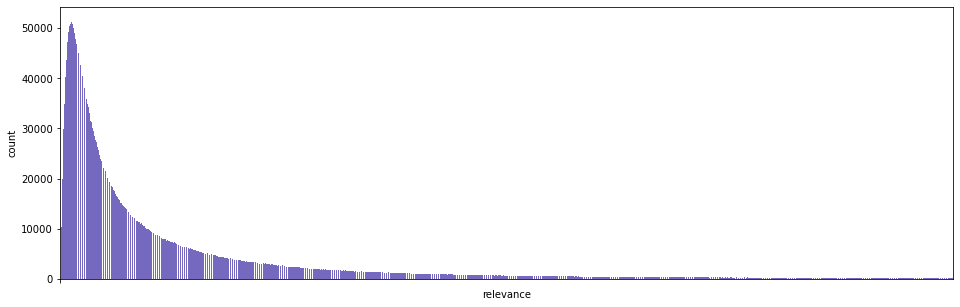

In [23]:
plt.figure(figsize=(16, 5))
ax = sns.countplot(x = 'relevance', data=genome_scores, color = 'slateblue')
t = [genome_scores['relevance'].min()]
plt.xticks(t)
plt.show()

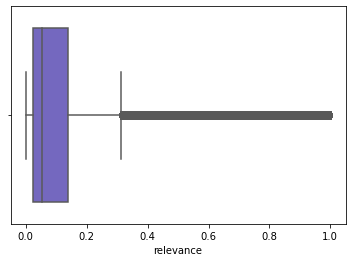

In [24]:
sns.boxplot(x = 'relevance', data=genome_scores, color = 'slateblue')
plt.show()

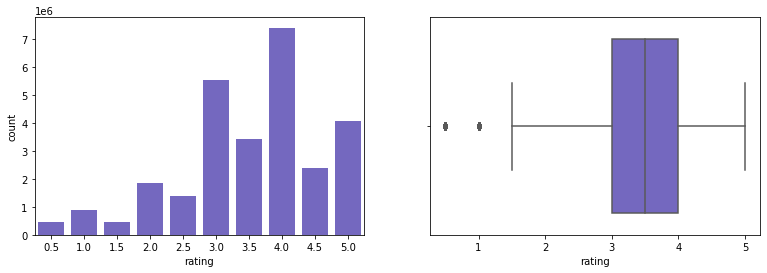

In [25]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(13, 4)
sns.countplot(x = 'rating', data=ratings, ax=ax[0],color = 'slateblue')
sns.boxplot(x = 'rating', data=ratings, ax=ax[1], color = 'slateblue')
plt.show()

W ramkach, w których występuje kolumna *timestamp* stworzymy kolejną kolumnę *date* w celu lepszej analizy czasu, w którym zostały wystawione oceny lub przypisane tagi.

In [26]:
ratings['date'] = pd.to_datetime(ratings['timestamp'], unit='s')
tags['date'] = pd.to_datetime(tags['timestamp'], unit='s')

## W ramce **Movies** dodamy nową kolumnę *year* zawierającą rok premiery danego filmu

Wybieramy go regexem z tytułu

In [27]:
strings = movies.title.tolist()
list_t = []
for string in strings:
    f=re.findall("\((\d{4})\)\s*$",string)
    if len(f)>0:
        list_t.append(f[0])
    else:
        list_t.append('')
l = []
for i in list_t:
    if i != '':
        l.append(int(i))
    else:
        l.append(0)
movies['year'] = l

In [28]:
movies['title']=movies['title'].apply(lambda x: re.sub("\ \(\d{4}\)\s*$",'',x))

In [29]:
df_ratings = ratings[['movieId','rating']].groupby(['movieId']).mean()
movies = pd.merge(movies,df_ratings,on='movieId',how='left')
display_side_by_side(movies.head(),movies.describe(),titles=['Movies','Description'])

Movies 
 
 
 
 movieId 
 title 
 genres 
 year 
 rating 
 
 
 
 
 0 
 1 
 Toy Story 
 Adventure|Animation|Children|Comedy|Fantasy 
 1995 
 3.886649 
 
 
 1 
 2 
 Jumanji 
 Adventure|Children|Fantasy 
 1995 
 3.246583 
 
 
 2 
 3 
 Grumpier Old Men 
 Comedy|Romance 
 1995 
 3.173981 
 
 
 3 
 4 
 Waiting to Exhale 
 Comedy|Drama|Romance 
 1995 
 2.874540 
 
 
 4 
 5 
 Father of the Bride Part II 
 Comedy 
 1995 
 3.077291 
 
 
 Description 
 
 
 
 movieId 
 year 
 rating 
 
 
 
 
 count 
 58098.000000 
 58098.000000 
 53889.000000 
 
 
 mean 
 111919.516197 
 1980.122999 
 3.068593 
 
 
 std 
 59862.660956 
 151.489523 
 0.736242 
 
 
 min 
 1.000000 
 0.000000 
 0.500000 
 
 
 25% 
 72437.750000 
 1975.000000 
 2.687500 
 
 
 50% 
 126549.000000 
 2001.000000 
 3.156250 
 
 
 75% 
 161449.500000 
 2011.000000 
 3.500000 
 
 
 max 
 193886.000000 
 2018.000000 
 5.000000

In [30]:
display_side_by_side(ratings.head(8),tags.head(8), movies.head(8),titles = ['Ratings', 'Tags', 'Movies'])

,userId,movieId,rating,timestamp,date
0,1,307,3.5,1256677221,2009-10-27 21:00:21
1,1,481,3.5,1256677456,2009-10-27 21:04:16
2,1,1091,1.5,1256677471,2009-10-27 21:04:31
3,1,1257,4.5,1256677460,2009-10-27 21:04:20
4,1,1449,4.5,1256677264,2009-10-27 21:01:04
5,1,1590,2.5,1256677236,2009-10-27 21:00:36
6,1,1591,1.5,1256677475,2009-10-27 21:04:35
7,1,2134,4.5,1256677464,2009-10-27 21:04:24
,userId,movieId,tag,timestamp,date
0,14,110,epic,1443148538,2015-09-25 02:35:38


Sprawdźmy, które gatunki występują najczęściej

<ipython-input-31-09971564c2c8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["genres_new"] = movies['genres'].str.replace('[^\w\s]', ' ')


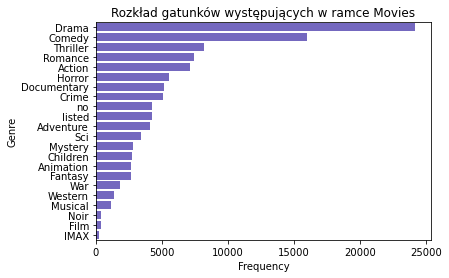

In [31]:
df = pd.DataFrame()
df["genres_new"] = movies['genres'].str.replace('[^\w\s]', ' ')
new_df = df.genres_new.str.split(expand=True).stack().value_counts().reset_index()
new_df.columns = ['Genre', 'Frequency']
new_df = new_df[new_df.Genre != 'Fi']
new_df = new_df[new_df.Genre != 'genres']
#new_df['Genre'].replace(to_replace ="Sci", value ="Sci Fi")
#fig.set_size_inches(40, 10)
sns.barplot(y = 'Genre', x = 'Frequency', data=new_df, color = 'slateblue').set(title='Rozkład gatunków występujących w ramce Movies')
plt.show()

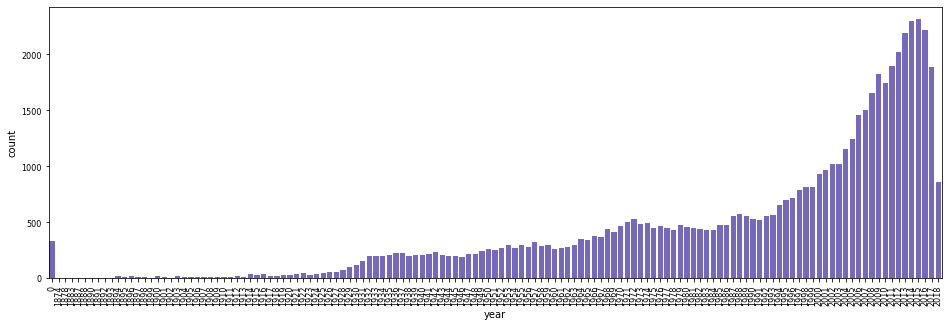

In [32]:
plt.figure(figsize=(16, 5))
ax = sns.countplot(x = 'year', data=movies,color = 'slateblue')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

## Uzupełnienie braków danych

Jak wyżej widzieliśmy, niektóre filmy nie posiadały w tytule daty premiery. Sprawdźmy, czy ma to związek z istnieniem danego filmu w bazie themoviedb.

In [33]:
moviesID = movies[movies.year == 0]
moviesID.merge(links, on='movieId', how='left').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 0 to 328
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  329 non-null    int64  
 1   title    329 non-null    object 
 2   genres   329 non-null    object 
 3   year     329 non-null    int64  
 4   rating   285 non-null    float64
 5   imdbId   329 non-null    int64  
 6   tmdbId   324 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 20.6+ KB


In [34]:
moviesID.merge(links, on='movieId', how='left').head()

,movieId,title,genres,year,rating,imdbId,tmdbId
0,32930,Category 6: Day of Destruction,Action|Drama,0,3.166667,428144,32128.0
1,40697,Babylon 5,Sci-Fi,0,3.895000,105946,NaN
2,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,0,3.444444,66079,5465.0
3,87442,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",Documentary,0,3.333333,1710542,57536.0
4,98063,Mona and the Time of Burning Love (Mona ja pal...,Drama,0,3.833333,87738,547680.0


W grupie filmów, które nie mają roku w tytule, tylko 3 nie mają również swojego indeksu w bazie themoviedb. Wynika z tego, że fakt, czy dany film występuje w podanej bazie, nie ma wpływu na posiadanie roku w tytule filmu. Obie kolumny nie są od siebie zależne.

## Scrapujemy rok z imdb.com

In [35]:
def get_movie_year(imdbId):
    imdbId = str(imdbId)
    while len(imdbId)<7:
        imdbId = "0"+imdbId
    response = requests.get("https://www.imdb.com/title/tt" + imdbId+"/releaseinfo").content.decode("utf-8") 
    matches = re.findall("<td class=\"release-date-item__date\" align=\"right\">.*(\d{4}) ?</td>",response)
    print("matches: ",matches)
    if len(matches)>0:
        return int(matches[0])
    return 0

In [36]:
i=0
missing=movies[movies.year == 0].shape[0]
for c, r in movies.loc[movies.year == 0].iterrows():
    imdbId = links.loc[links.movieId == r['movieId'],'imdbId'].item()
    progress =math.floor(100*i/missing)
    print(progress," %")
    
    print('<','='*progress,'_'*(100-progress),'>')
    
    print('id: ', imdbId)
    year = get_movie_year(imdbId)
    print('year: ',year,"\n")
    movies.loc[links.movieId == r['movieId'],'year'] = year
    i=i+1

0  %
<  ____________________________________________________________________________________________________ >
id:  428144
matches:  ['2004', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2006', '2006', '2010', '2010', '2013']
year:  2004 

0  %
<  ____________________________________________________________________________________________________ >
id:  105946
matches:  ['1993', '1993', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1997', '1997', '1997', '1997', '1997', '1997', '1997', '1997', '1997', '1998', '1998', '1998', '1998', '1998', '1999', '2000', '2000', '2002'

In [37]:
movies[movies.year == 0].shape[0]

13

In [40]:
movies[movies.year == 0]

,movieId,title,genres,year,rating
33603,137990,Dark Tides,(no genres listed),0,NaN
37080,146106,Dhadakebaaz,(no genres listed),0,3.5
37204,146364,Dil Kya Kare,(no genres listed),0,1.0
42573,159125,Anybody's Son Will Do,(no genres listed),0,5.0
45362,165385,The Adventures of Cinderella's Daughter,(no genres listed),0,3.5
45425,165519,Always Faithful,(no genres listed),0,4.5
48172,171507,Unspeakable Horrors: The Plan 9 Conspiracy,Comedy|Documentary,0,NaN
50874,177265,Checkmate,(no genres listed),0,3.0
51031,177625,Bigfoot in Europe: Sasquatch Encounters Abroad,Action|Documentary,0,3.0
53840,183871,Functional Fitness,(no genres listed),0,2.0


Skrypt nie znalazł danych do kilku filmów. Jest to jednak na tyle mała liczba, że możemy te braki uzupełnić ręcznie.

In [41]:
movies.loc[movies.year == 0,'year'] =[1998, 1990,1999,1983,2000,2012,2016,2019,2015,2016,2005,2014,2010]

In [42]:
movies.to_csv('movies_full.csv', index=False)

Zpisujemy dane by nie musiec w przyszłości wykonywać czasochłonnego skryptu

In [43]:
#movies = pd.read_csv('movies_full.csv')

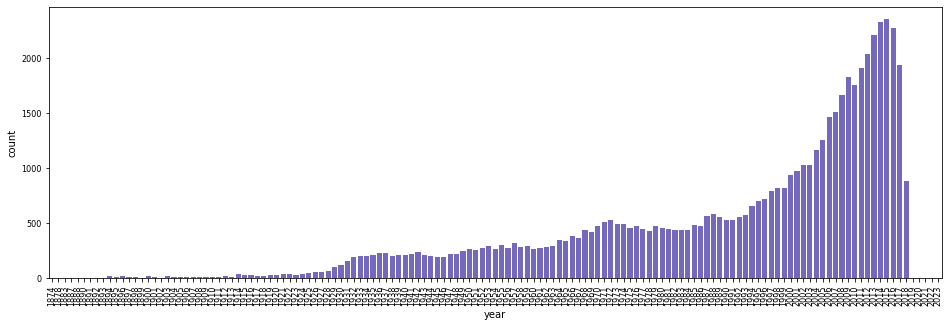

In [44]:
plt.figure(figsize=(16, 5))
ax = sns.countplot(x = 'year', data=movies,color = 'slateblue')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

Okazuje się że znaleźliśmy daty nawet z 2023 roku. Jednak po sprawdzeniu stwierdziliśmy, że nie jest to błąd. 

In [45]:
movies[movies.year <= 1500].shape[0]

0

### Braki w kolumnie *rating*
W kolumnie **rating** puste komórki zastąpimy medianą wszystkich wartości z naszej kolumny. Te puste komórki występują z powodu braku oceny niektórych filmów.

In [46]:
movies['rating'].fillna(movies['rating'].median(), inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58098 entries, 0 to 58097
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  58098 non-null  int64  
 1   title    58098 non-null  object 
 2   genres   58098 non-null  object 
 3   year     58098 non-null  int64  
 4   rating   58098 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.7+ MB


### Braki w kolumnie *tmdbId*
Każdy film ma swój unikalny numer potrzebny do odnalezienia go w bazie themoviedb, zatem puste komórki uzupełnimy wartością 0.0, która będzie mówić o tym, że podanego filmu nie ma w danej bazie.

In [47]:
links['tmdbId'].fillna(0.0, inplace=True)
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  58098 non-null  int64  
 1   imdbId   58098 non-null  int64  
 2   tmdbId   58098 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.3 MB


### Braki w kolumnie *tag*
Aby zlikwidować braki danych w kolumnie tag, wystarczy usunąć określone wiersze. Celem ramki **Tags** jest wskazanie nam jaki tag przypisał dany użytkownik danemu filmu. Dodatkowo z powyższej analizy widzimy, że na ponad milion wierszy brakuje raptem kilkanaście wartości. Zatem jeśli kolumna tag ma pustą komórkę, usunięcie obserwacji nie wpłynie znacząco na nasz model. 

In [48]:
tags = tags.dropna()
tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108981 entries, 0 to 1108996
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   userId     1108981 non-null  int64         
 1   movieId    1108981 non-null  int64         
 2   tag        1108981 non-null  object        
 3   timestamp  1108981 non-null  int64         
 4   date       1108981 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 50.8+ MB


## Kodowanie zmiennych kategorycznych

### Kodowanie kolumny `genres` w ramce  *Movies*

In [49]:
string = ''
for line in movies.genres:
    string += line + '|'
# print(string)

genres = [x for x in list(set(string.split('|'))) if x]
print(*genres, sep="\n")

War
Thriller
Fantasy
Musical
Adventure
Animation
Documentary
Mystery
Children
Western
(no genres listed)
Film-Noir
Crime
Romance
IMAX
Horror
Sci-Fi
Comedy
Action
Drama


In [50]:
movies2 = movies[:]

for genre in genres:
    movies2.insert(len(movies2.columns), genre, movies['genres'].str.contains(pat=genre)*1) 

C:\Users\Muffin\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [51]:
del movies2['genres']
del movies2['(no genres listed)']
#usuwamy '(no genres listed)' by zapobiec współliniowości

movies2

,movieId,title,year,rating,War,Thriller,Fantasy,Musical,Adventure,Animation,...,Western,Film-Noir,Crime,Romance,IMAX,Horror,Sci-Fi,Comedy,Action,Drama
0,1,Toy Story,1995,3.886649,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,2,Jumanji,1995,3.246583,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,3.173981,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,4,Waiting to Exhale,1995,2.874540,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,5,Father of the Bride Part II,1995,3.077291,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58093,193876,The Great Glinka,1946,3.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58094,193878,Les tribulations d'une caissière,2011,2.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
58095,193880,Her Name Was Mumu,2016,2.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
58096,193882,Flora,2017,2.000000,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1


### Kodowanie zmiennej `tag`

Ponieważ unikalnych tagów jest ponad 1000, zdecydowaliśmy się wykożystać je w nieco inny sposób. Kożystając z tabeli *genom_scores* wybraliśmy kilka tagów, które mają średnio największą 'odpowiedniość' tagu do wszystkich filmów. Zdecydowaliśmy się na użycie 6 najlepszych. Zakodowaliśmy je do tabeli movies oneHot enkoderem gdzie 1 = film został przynajmniej raz otagowany danym tagiem, 0 = wpp.

In [52]:
genome_scores

,movieId,tagId,relevance
0,1,1,0.02900
1,1,2,0.02375
2,1,3,0.05425
3,1,4,0.06875
4,1,5,0.16000
...,...,...,...
14862523,187595,1124,0.10700
14862524,187595,1125,0.05850
14862525,187595,1126,0.03800
14862526,187595,1127,0.10225


### Najlepsze tagi

In [53]:
genome = genome_scores.join(genome_tags.set_index('tagId'), on='tagId')
rel_tags = genome[['tag','relevance']].groupby(by='tag', as_index=False).median().sort_values(by=['relevance'], ascending=False)
rel_tags.head(10)

,tag,relevance
741,original,0.733250
645,mentor,0.491500
187,catastrophe,0.462750
971,storytelling,0.432250
467,great ending,0.422500
301,dialogue,0.417750
866,runaway,0.409625
463,great,0.387750
451,good soundtrack,0.386000
444,good,0.383625


In [54]:
pop_tags = rel_tags.head(6)

### Encoding

In [55]:
tags2 = tags[:]

for tag in pop_tags['tag']:
    tags2.insert(len(tags2.columns), tag, tags['tag'].str.contains(pat=tag)*1)

del tags2['userId']
del tags2['tag']
del tags2['timestamp']
del tags2['date']

tags2 = tags2.groupby(by='movieId', as_index=False).sum()

for tag in pop_tags['tag']:
    tags2[tag] = (tags2[tag]>0)*1

tags2[tags2.original > 0]

,movieId,original,mentor,catastrophe,storytelling,great ending,dialogue
6,7,1,0,0,0,0,0
31,32,1,0,0,0,1,0
33,34,1,0,0,0,0,0
49,50,1,0,0,1,1,0
248,260,1,0,0,0,0,1
...,...,...,...,...,...,...,...
45395,189037,1,0,0,0,0,0
45555,189567,1,0,0,0,0,0
45753,191113,1,0,0,0,0,0
45817,191811,1,0,0,0,0,0


In [56]:
movies2_tags = movies2.join(tags2.set_index('movieId'), on='movieId')

for col in ['original','mentor','catastrophe','storytelling','great ending','dialogue']:
    movies2_tags[col] = pd.to_numeric(movies2_tags[col].replace(math.nan,0), downcast='integer')

movies2_tags.head(8)

,movieId,title,year,rating,War,Thriller,Fantasy,Musical,Adventure,Animation,...,Sci-Fi,Comedy,Action,Drama,original,mentor,catastrophe,storytelling,great ending,dialogue
0,1,Toy Story,1995,3.886649,0,0,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,3.246583,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,3.173981,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale,1995,2.874540,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,5,Father of the Bride Part II,1995,3.077291,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,6,Heat,1995,3.844211,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,7,Sabrina,1995,3.371348,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
7,8,Tom and Huck,1995,3.122482,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
movies.to_csv('movies_EDA.csv', index=False)

## Korelacje
### Korelacja między gatunkami filmów

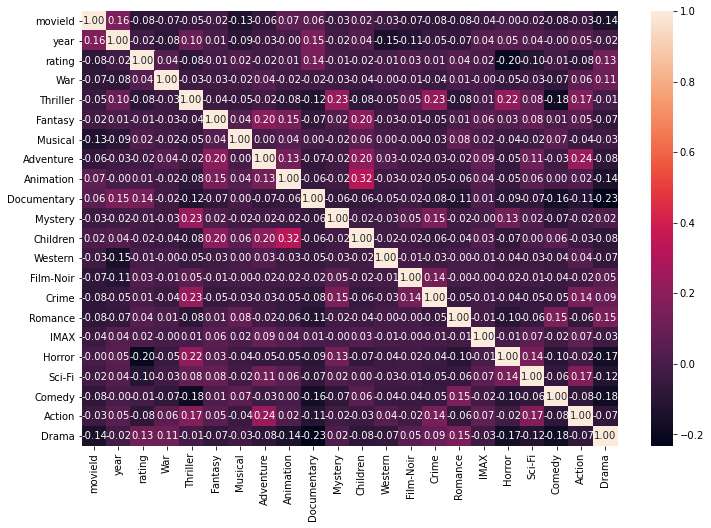

In [58]:
plt.figure(figsize=(12,8))
corr = movies2.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt=".2f")
plt.show()

Występują korelacje między niektórymi zmiennymi:
- korelacja między zmienną `Children` i `Animation`
- `Thriller` z `Horror`, `Mystery` i `Crime`
- `Adventure` z `Fantasy` i `Action`

Te gatunki faktycznie często się ze sobą łączą (np. filmy dla dzieci są często animowane).

### Korelacja między rating a gatunkami filmów
W tej sekcji zostanie zbadana zależność między gatunkami a oceną. Czy są jakieś gatunki filmów które mają niskie recenzje?

In [59]:
movies2.head()

,movieId,title,year,rating,War,Thriller,Fantasy,Musical,Adventure,Animation,...,Western,Film-Noir,Crime,Romance,IMAX,Horror,Sci-Fi,Comedy,Action,Drama
0,1,Toy Story,1995,3.886649,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,2,Jumanji,1995,3.246583,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,3.173981,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,4,Waiting to Exhale,1995,2.874540,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,5,Father of the Bride Part II,1995,3.077291,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
ratings.head()

,userId,movieId,rating,timestamp,date
0,1,307,3.5,1256677221,2009-10-27 21:00:21
1,1,481,3.5,1256677456,2009-10-27 21:04:16
2,1,1091,1.5,1256677471,2009-10-27 21:04:31
3,1,1257,4.5,1256677460,2009-10-27 21:04:20
4,1,1449,4.5,1256677264,2009-10-27 21:01:04


In [61]:
movies2_ratings = movies2.join(ratings.set_index('movieId'), on='movieId',lsuffix='_avg', rsuffix='_indyvidual')

In [62]:
del movies2_ratings['year']
del movies2_ratings['userId']
del movies2_ratings['timestamp']
del movies2_ratings['date']

movies2_ratings

,movieId,title,rating_avg,War,Thriller,Fantasy,Musical,Adventure,Animation,Documentary,...,Film-Noir,Crime,Romance,IMAX,Horror,Sci-Fi,Comedy,Action,Drama,rating_indyvidual
0,1,Toy Story,3.886649,0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,4.0
0,1,Toy Story,3.886649,0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,5.0
0,1,Toy Story,3.886649,0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,4.5
0,1,Toy Story,3.886649,0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,4.0
0,1,Toy Story,3.886649,0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58094,193878,Les tribulations d'une caissière,2.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2.0
58095,193880,Her Name Was Mumu,2.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2.0
58096,193882,Flora,2.000000,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,2.0
58097,193886,Leal,3.250000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,2.5


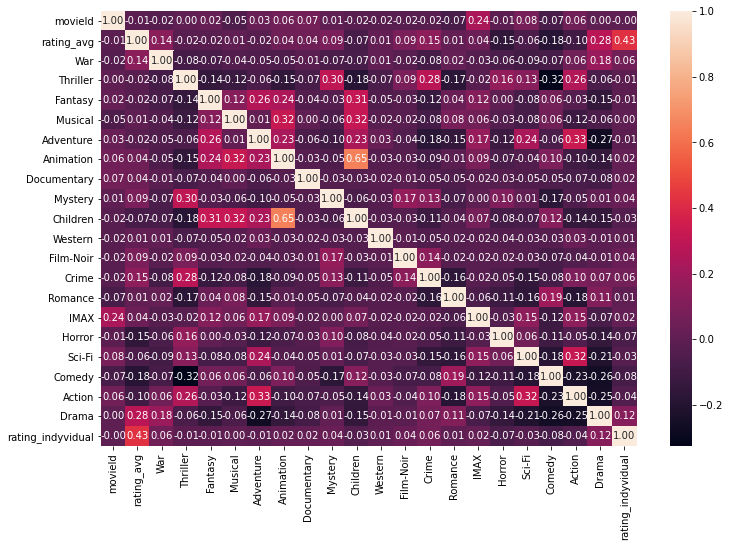

In [63]:
plt.figure(figsize=(12,8))
corr = movies2_ratings.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt=".2f")
plt.show()

Jak widać z powyższej heatmapy, jednak gatunek filmu nie ma wpływu na jego ocenę.  
Można też dostrzec, że niektóre korelacje są silniejsze niż w poprzedniej heatmapie. Jest tak, ponieważ fimy się powtarzają (jeden film mogło oceniać kilka osób). Stąd też różnice w wartościach.

### Korelacje między wybranymi tagami i gatunkami

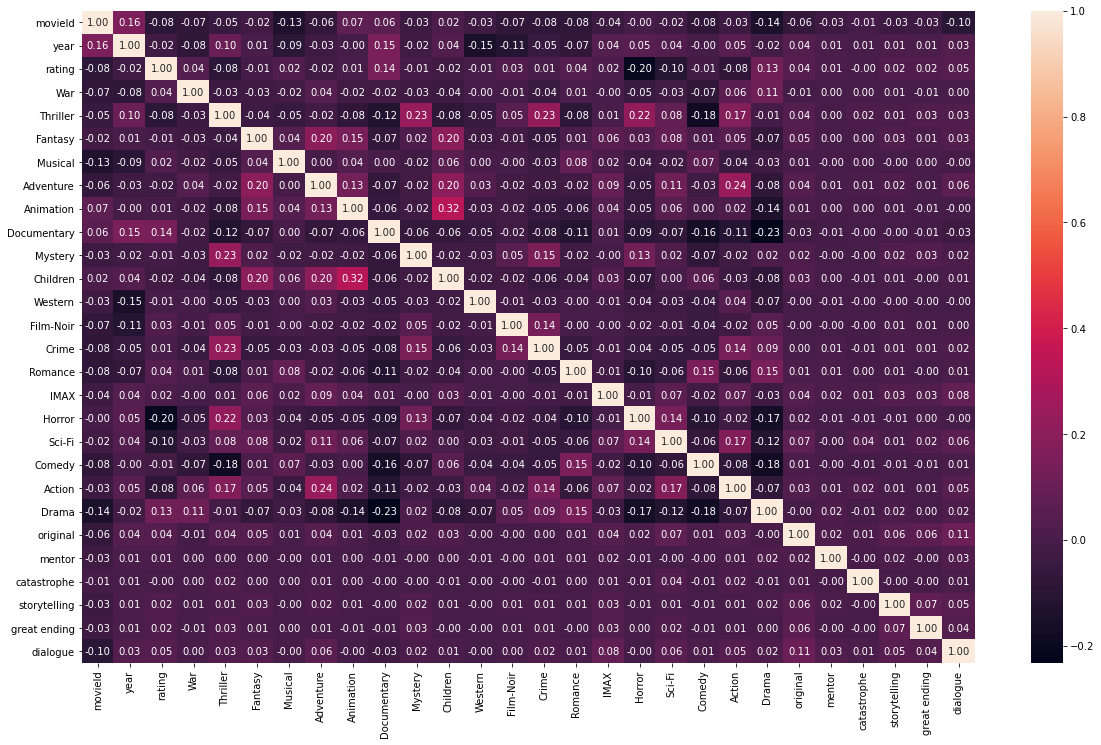

In [64]:
plt.figure(figsize=(20,12))
corr = movies2_tags.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt=".2f")
plt.show()

Jak widać tagi nie mają żadnych istotnych korelacji

# Podsumowanie

Nasz problem rekomendacji filmów polegac będzie na analizie skupień. W tym celu wyekstrachowaliśmy najważniejsze cechy oraz przekształciliśmy dane z różnych tabel do jednej tabeli *movies* i tylko na niej będziemy budować modele. Zmieniliśmy dane w następujący sposób:
- Wyjęliśmy rok emisji z tytułu do nowej kolumny
- Wyciągneliśmy poszczególne gatunki filmów i zaenkodowaliśmy je OneHot
- Ze wszystkich tagów wybraliśmy 6 najlepszych i zaencodowaliśmy ich obecność OneHot
- Dla każdego filmu obliczyliśmy średnią wszystkich ocen i dodaliśmy ją jako kolumnę
- Brakujące średnie ocen uzupełniliśmy medianą
- Do uzupełnienia brakujących lat emisji wykożystaliśmy skrypt oraz ręczne wprowadzanie

Uznaliśmy też niektóre dane za nadmiarowe, jak na przykład *timestamp*. Uznaliśmy bowiem, że ich wpływ będzie znikomy w porównaniu do poziomu skomplikowania potencjalnego modelu na nich pracującego.

In [67]:
movies2

,movieId,title,year,rating,War,Thriller,Fantasy,Musical,Adventure,Animation,...,Western,Film-Noir,Crime,Romance,IMAX,Horror,Sci-Fi,Comedy,Action,Drama
0,1,Toy Story,1995,3.886649,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,2,Jumanji,1995,3.246583,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,3.173981,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,4,Waiting to Exhale,1995,2.874540,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,5,Father of the Bride Part II,1995,3.077291,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58093,193876,The Great Glinka,1946,3.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58094,193878,Les tribulations d'une caissière,2011,2.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
58095,193880,Her Name Was Mumu,2016,2.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
58096,193882,Flora,2017,2.000000,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
